In [129]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
import sklearn

In [131]:
import warnings
warnings.filterwarnings("ignore")

In [133]:
data=pd.read_csv("Breast_Cancer.csv")

In [135]:
data.sample(10)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
1278,67,White,Married,T1,N3,IIIC,Poorly differentiated,3,Regional,14,Positive,Negative,26,22,48,Dead
384,55,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,17,Positive,Positive,22,1,104,Alive
1238,59,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,4,Positive,Positive,4,1,52,Alive
1709,63,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,21,5,3,Dead
3165,56,White,Married,T2,N2,IIIA,Poorly differentiated,3,Regional,32,Negative,Negative,24,5,81,Alive
2284,49,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Positive,13,2,102,Alive
1124,59,Other,Married,T2,N1,IIB,Poorly differentiated,3,Regional,25,Positive,Positive,11,2,76,Alive
2021,41,Black,Single,T1,N1,IIA,Moderately differentiated,2,Regional,8,Positive,Positive,17,1,58,Alive
1142,46,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,37,Positive,Positive,17,9,61,Alive
994,55,White,Single,T2,N1,IIB,Moderately differentiated,2,Regional,35,Positive,Positive,11,11,73,Alive


In [137]:
data["Status"].value_counts()

Status
Alive    3408
Dead      616
Name: count, dtype: int64

In [139]:
data.notnull().sum().sum()/(data.shape[0]*data.shape[1])*100

100.0

In [141]:
data.drop_duplicates(inplace=True)

In [143]:
data["Status"]=data["Status"].apply(lambda x: 1 if x=="Alive" else 0)

In [145]:
data.Status.value_counts()

Status
1    3407
0     616
Name: count, dtype: int64

In [147]:
data=pd.get_dummies(data).astype(int)

In [149]:
data

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Race_Black,Race_Other,Race_White,Marital Status_Divorced,...,Grade_ anaplastic; Grade IV,Grade_1,Grade_2,Grade_3,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive
0,68,4,24,1,60,1,0,0,1,0,...,0,0,0,1,0,1,0,1,0,1
1,50,35,14,5,62,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,1
2,58,63,14,7,75,1,0,0,1,1,...,0,0,1,0,0,1,0,1,0,1
3,58,18,2,1,84,1,0,0,1,0,...,0,0,0,1,0,1,0,1,0,1
4,47,41,3,1,50,1,0,0,1,0,...,0,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,9,1,1,49,1,0,1,0,0,...,0,0,1,0,0,1,0,1,0,1
4020,56,46,14,8,69,1,0,0,1,1,...,0,0,1,0,0,1,0,1,0,1
4021,68,22,11,3,69,1,0,0,1,0,...,0,0,1,0,0,1,0,1,1,0
4022,58,44,11,1,72,1,1,0,0,1,...,0,0,1,0,0,1,0,1,0,1


In [151]:
x=data[["Age","Survival Months"]]
y=data["Status"]

In [153]:
from sklearn.model_selection import train_test_split

In [227]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [229]:
from sklearn.linear_model import LogisticRegression

In [231]:
log= LogisticRegression()

<Axes: xlabel='Age', ylabel='Status'>

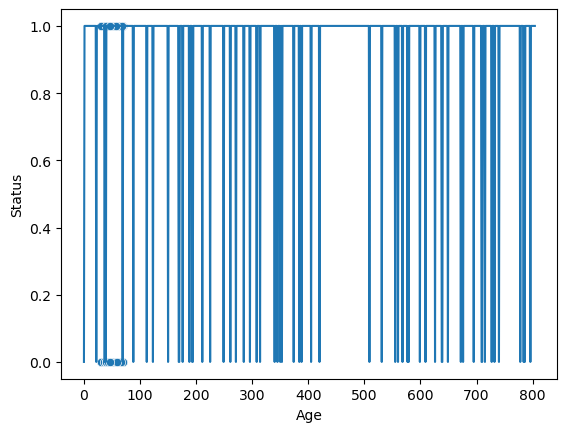

In [233]:
sns.scatterplot(y=data["Status"],x=data["Age"])
sns.lineplot(y_pred)

In [235]:
log.fit(x_train,y_train)

LogisticRegression()

In [237]:
log.score(x_test,y_test)*100

86.95652173913044

In [239]:
log.score(x_train,y_train)*100

88.9683032939714

In [241]:
y_pred=log.predict(x_test)

In [243]:
data.sample(10)

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Race_Black,Race_Other,Race_White,Marital Status_Divorced,...,Grade_ anaplastic; Grade IV,Grade_1,Grade_2,Grade_3,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive
3804,39,44,18,2,57,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,1
3708,64,50,38,21,84,1,0,0,1,0,...,0,0,0,1,0,1,0,1,0,1
3167,62,17,4,1,84,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,1
3932,46,22,20,1,53,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,1
663,65,51,19,3,36,0,0,0,1,0,...,0,0,1,0,0,1,1,0,1,0
3074,69,42,7,2,48,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,1
3051,48,25,11,2,101,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,1
1481,43,61,19,2,61,1,0,0,1,0,...,0,0,0,1,0,1,0,1,0,1
571,64,32,25,1,69,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,1
581,52,20,14,1,18,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,1


In [255]:
from sklearn.tree import DecisionTreeClassifier

In [305]:
dt=DecisionTreeClassifier(max_depth=3)

In [307]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [309]:
dt.score(x_test,y_test)*100

87.20496894409938

In [311]:
dt.score(x_train,y_train)*100

90.70851460534493

In [335]:
y_test

2745    1
1029    0
2840    1
3616    1
394     0
       ..
1089    1
1063    1
3710    1
1467    1
427     1
Name: Status, Length: 805, dtype: int32

In [363]:
from sklearn.neighbors import KNeighborsClassifier

In [373]:
knn=KNeighborsClassifier()

In [375]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [377]:
knn.score(x_train,y_train)*100

91.29894344313239

In [379]:
knn.score(x_test,y_test)*100

87.32919254658385

In [381]:
knn.predict([[67,48]])

array([1])

In [435]:
from sklearn.svm import SVC

In [437]:
sc=SVC(degree=1)

In [439]:
sc.fit(x_train,y_train)

SVC(degree=1)

In [441]:
sc.score(x_train,y_train)*100

90.1491609695463

In [443]:
sc.score(x_test,y_test)*100

86.95652173913044

In [445]:
sc.predict([[67,48]])

array([1])

In [447]:
from sklearn.ensemble import RandomForestClassifier

In [449]:
rf= RandomForestClassifier()

In [453]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [457]:
rf.score(x_test,y_test)*100

85.59006211180125

In [459]:
rf.score(x_train,y_train)*100

95.05904288377874

In [461]:
rf.predict([[67,48]])

array([1])